In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [3]:
t1_df = pd.read_hdf('t1_run884.h5', key='/ORSIS3302DecoderForEnergy')
energy = t1_df.energy

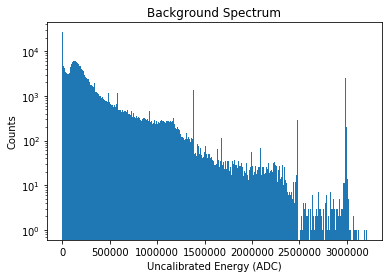

In [11]:
hist, bins, _ = plt.hist(energy, 500)
plt.yscale('log')
plt.title('Background Spectrum')
plt.xlabel('Uncalibrated Energy (ADC)')
plt.ylabel('Counts')
plt.show()

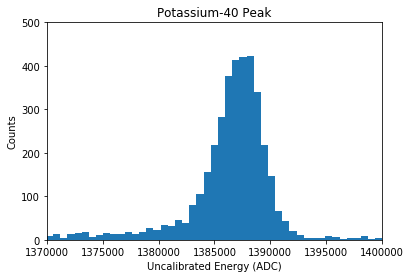

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
K_hist, K_bins, _ = plt.hist(energy, 5000)
#plt.yscale('log')
plt.xlim(1370000, 1400000)
plt.ylim(0, 500)
plt.title('Potassium-40 Peak')
plt.xlabel('Uncalibrated Energy (ADC)')
plt.ylabel('Counts')
plt.show()

In [34]:
bin_width = K_bins[1] - K_bins[0]

start_index = int(1375000 / bin_width)
stop_index = int(1395000 / bin_width)

fit_bins = K_bins[start_index:stop_index]
fit_hist = K_hist[start_index:stop_index]

def func(x, a, b, c, d, e):
    return a * np.exp(((x - b) / c )^2) + np.exp(d * x + e) 

popt, pcov = curve_fit(func, fit_bins, fit_hist)

ax.plot(fit_bins, func(fit_bins, *popt), label='Fit: $%5.3f\,e^{-%5.3f\,t} + %5.3f$' % tuple(popt))